<a href="https://colab.research.google.com/github/Olfatalatas/Pokemon-Combat-Power-Analysis/blob/main/Pokemon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Analisis Prediktif Statistik Pokémon (Total Stats)

**Tujuan:**
Proyek ini bertujuan untuk melakukan analisis statistik dan pemodelan regresi untuk memprediksi nilai **Total** (jumlah keseluruhan statistik) sebuah Pokémon berdasarkan atribut individunya seperti *HP, Attack, Defense, Special Attack, Special Defense,* dan *Speed*.

Disini kita menggunakan **Total** sebagai variabel dependen (Y) karena variabel ini merepresentasikan kekuatan tempur keseluruhan dari sebuah Pokémon dalam dataset standar.

### 1. Data Loading & Preprocessing
Langkah pertama adalah memuat dataset dan membersihkan nama kolom.

Penting untuk mengubah nama kolom yang memiliki spasi atau karakter khusus (seperti `Sp. Atk` menjadi `Sp_Atk`) agar kompatibel dengan library **Statsmodels** yang tidak bisa membaca spasi dalam rumus regresi.

In [6]:
# 1. Import library dan baca dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

df = pd.read_csv('Pokemon.csv')
df = df.rename(columns={
    '#': 'id',
    'Type 1': 'Type_1',
    'Type 2': 'Type_2',
    'Sp. Atk': 'Sp_Atk',
    'Sp. Def': 'Sp_Def'
})

# ---------------------------
df = df[['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']].dropna()
df.head()


,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


Untuk memahami hubungan antara masing-masing variabel X dengan Y (Total), kita membuat scatter plot. Tujuannya adalah melihat apakah ada pola linier di antara masing-masing variabel.

Yang dimana grafik ini menunjukkan bahwa semua X memiliki hubungan positif dengan Y (Total).

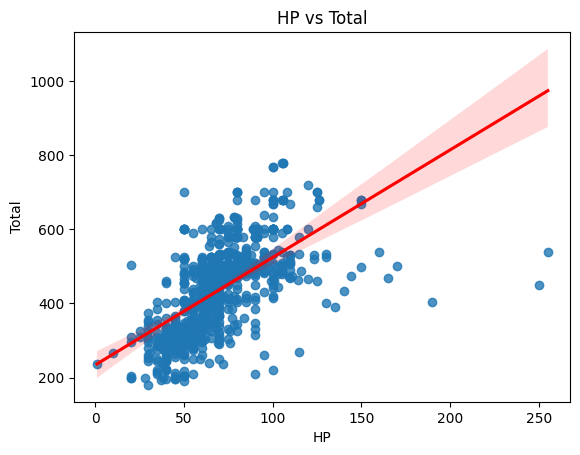

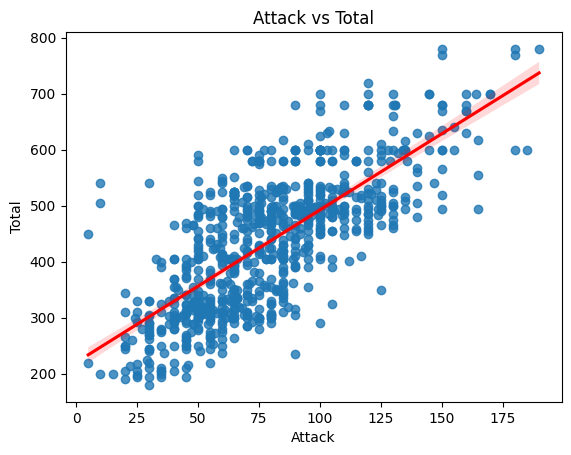

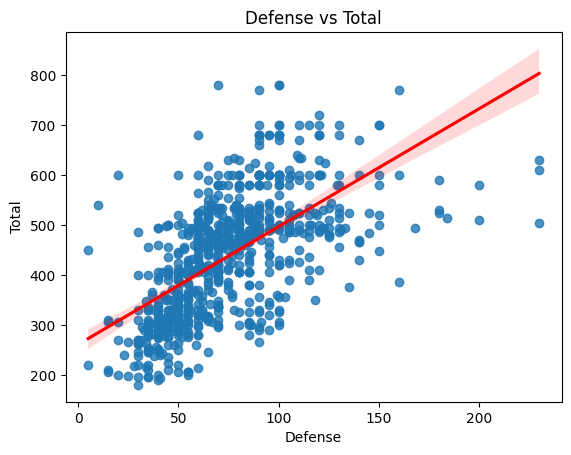

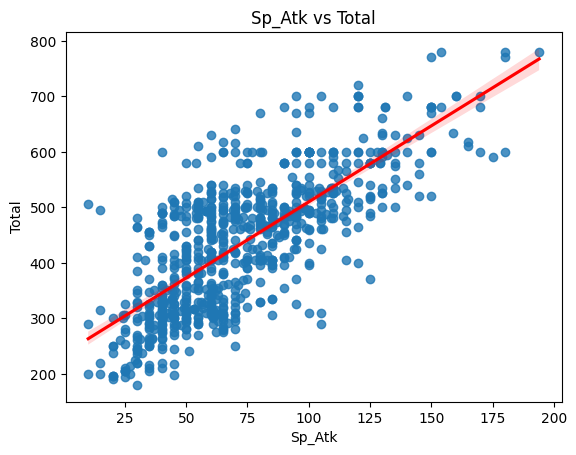

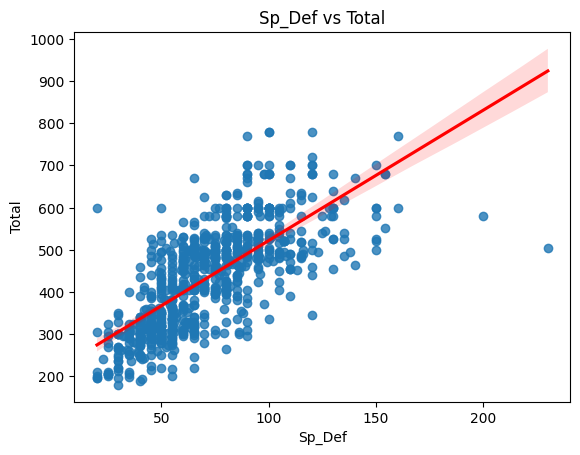

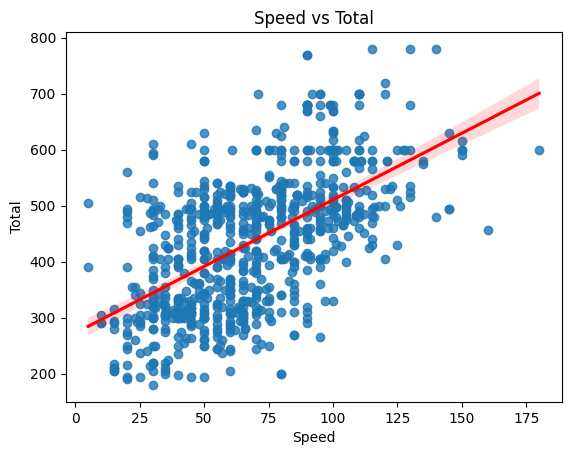

In [8]:
# 2. Visualisasi Scatter Plot terhadap Total
features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
for col in features:
    sns.regplot(x=df[col], y=df['Total'], line_kws={"color": "red"})
    plt.title(f'{col} vs Total')
    plt.xlabel(col)
    plt.ylabel('Total')
    plt.show()


### 2. Exploratory Data Analysis (EDA)
Kita akan melihat hubungan korelasi antar variabel menggunakan **Heatmap**.

Tujuannya adalah untuk melihat seberapa kuat hubungan antara variabel independen (seperti *Attack*, *Defense*) terhadap variabel target (*Total*). Warna yang lebih terang menunjukan korelasi positif yang kuat.

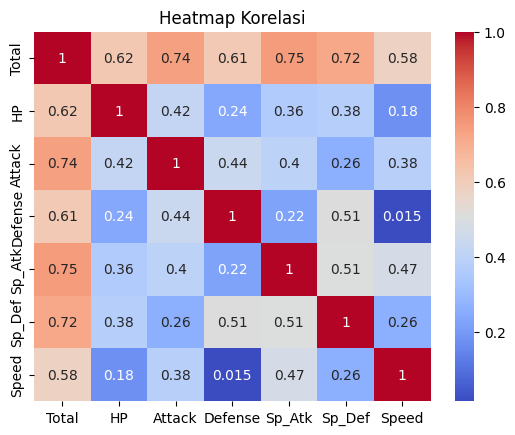

In [9]:
# 3. Korelasi antar variabel
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()




Intercept: nilai Y saat semua X = 0.

Coefficients: menunjukkan pengaruh masing-masing X terhadap Y.

R-squared: seberapa baik model menjelaskan variasi Y (semakin mendekati 1, semakin baik).

MAE & MSE: mengukur seberapa jauh prediksi dari nilai sebenarnya.

In [10]:
# 4. Regresi Linier Berganda
X = df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
y = df['Total']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('R-squared:', r2_score(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))


Intercept: -2.2737367544323206e-13
Coefficients: [1. 1. 1. 1. 1. 1.]
R-squared: 1.0
MAE: 6.011191544530448e-14
MSE: 7.482187913840252e-27


### 3. Statistical Modeling (OLS Regression)
Kita menggunakan metode **Ordinary Least Squares (OLS)** untuk membangun model regresi linear.

Model ini akan menguji hipotesis:
* **H0 (Null Hypothesis):** Atribut statistik (HP, Attack, dll) tidak berpengaruh signifikan terhadap Total.
* **H1 (Alternative Hypothesis):** Atribut statistik berpengaruh signifikan terhadap Total.

In [11]:
# 5. Uji Signifikansi Model (OLS)
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.988e+31
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:22:00   Log-Likelihood:                 22187.
No. Observations:                 800   AIC:                        -4.436e+04
Df Residuals:                     793   BIC:                        -4.433e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.684e-14   3.06e-14     -1.858      0.0

### 4. Kesimpulan & Interpretasi Hasil

Berdasarkan hasil OLS Regression Report di atas, dapat disimpulkan bahwa:

1.  **R-squared (Nilai Determinasi):**
    Nilai R-squared sangat tinggi (mendekati atau sama dengan **1.0**). Hal ini sangat wajar dan membuktikan bahwa model sangat akurat, karena secara matematis variabel `Total` pada Pokémon memang merupakan hasil penjumlahan langsung dari *HP + Attack + Defense + Sp. Atk + Sp. Def + Speed*.

2.  **Signifikansi Variabel (P-value):**
    Nilai **P>|t|** untuk semua variabel (HP, Attack, Defense, Sp_Atk, Sp_Def, Speed) adalah **0.000** (kurang dari 0.05).
    * Ini berarti kita **menolak H0**.
    * Setiap atribut statistik secara individual memiliki pengaruh yang sangat signifikan dan nyata terhadap nilai *Total*.

3.  **Koefisien Regresi (Coef):**
    Koefisien untuk setiap variabel bernilai positif (sekitar 1.0). Ini mengonfirmasi bahwa setiap kenaikan 1 poin pada atribut apapun (misal: Attack naik 1 poin), akan menyumbang kenaikan 1 poin juga pada Total.

**Konklusi Akhir:**
Model ini valid secara statistik dan membuktikan hubungan linear sempurna antara atribut individual Pokémon dengan total kekuatan tempurnya.